<a href="https://colab.research.google.com/github/raneemalshehri/lab-image-classification-using-convolutional-neural-networks/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


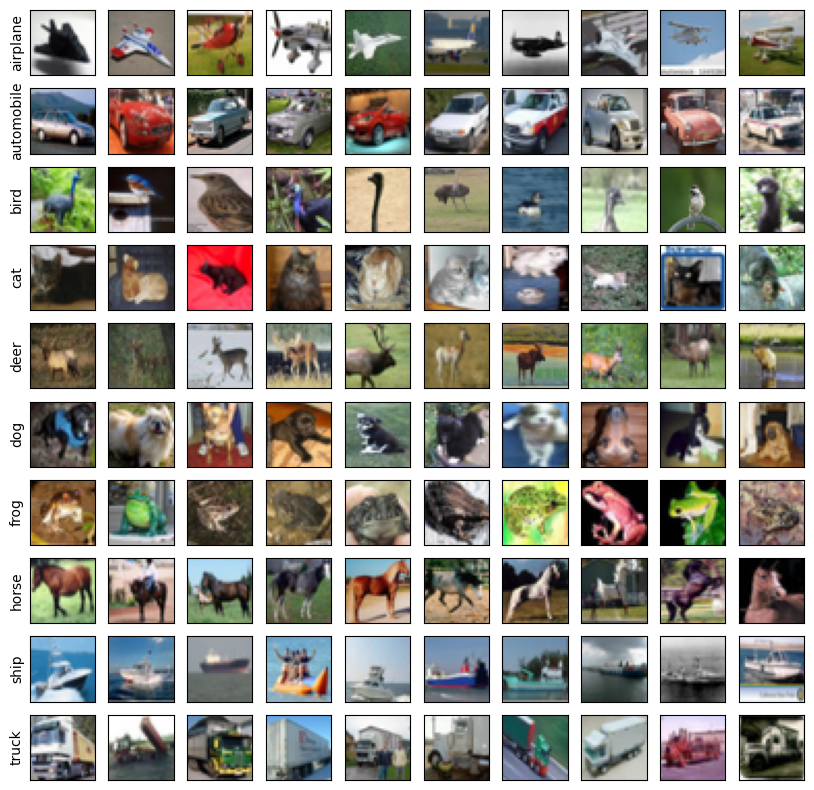

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig = plt.figure(figsize=(10, 10))
for i in range(10):
  for j in range(10):
    ax = fig.add_subplot(10, 10, i * 10 + j + 1)
    ax.imshow(x_train[np.where(y_train == i)[0][j]])
    plt.xticks([])
    plt.yticks([])
    if j == 0 :
      plt.ylabel(class_names[i], fontsize=10)
plt.show()

# Convert labels to one-hot encoded form
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [5]:
from keras.backend import clear_session
clear_session()

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))






model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD

In [9]:
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - accuracy: 0.1532 - loss: 2.2629 - val_accuracy: 0.2304 - val_loss: 2.1542
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2611 - loss: 2.1160 - val_accuracy: 0.3024 - val_loss: 2.0219
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3023 - loss: 1.9960 - val_accuracy: 0.3130 - val_loss: 1.9432
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3199 - loss: 1.9357 - val_accuracy: 0.3303 - val_loss: 1.8988
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3407 - loss: 1.8873 - val_accuracy: 0.3406 - val_loss: 1.8788
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3495 - loss: 1.8611 - val_accuracy: 0.3570 - val_loss: 1.8406
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3593 - loss: 1.8339 - val_accuracy: 0.3722 - val_loss: 1.8124
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3700 - loss: 1.8024 - val_accuracy: 0.3792 - val_los

*   Plot the cross entropy loss curve and the accuracy curve

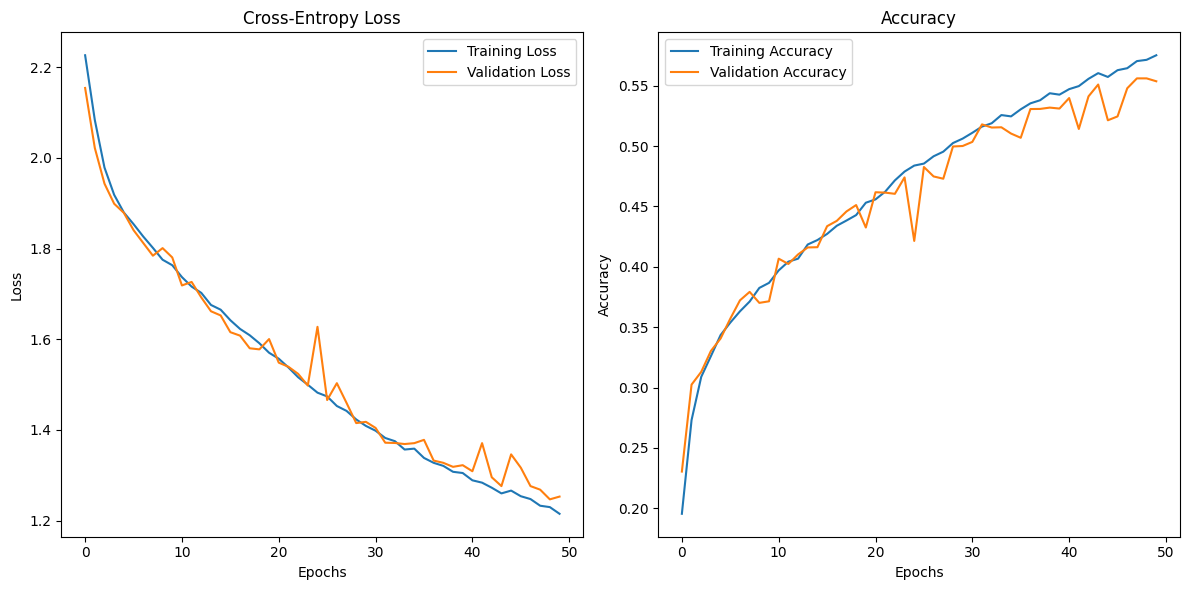

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Cross-Entropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()




plt.tight_layout()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [11]:
from keras.backend import clear_session
clear_session()

In [13]:
# Create the VGG-like model
model = models.Sequential()

In [14]:

model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3), name='conv2d_1'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='conv2d_2'))
model.add(layers.MaxPooling2D((2, 2), name='maxpooling'))
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(128, activation='relu', name='dense_128'))
model.add(layers.Dense(10, activation='softmax', name='output_layer'))  # 10 classes for CIFAR-10
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpooling (MaxPooling2D)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_128 (Dense)                    │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - accuracy: 0.1377 - loss: 2.2839 - val_accuracy: 0.2776 - val_loss: 2.1738
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2816 - loss: 2.1154 - val_accuracy: 0.3099 - val_loss: 1.9758
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2996 - loss: 1.9826 - val_accuracy: 0.3216 - val_loss: 1.9108
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3276 - loss: 1.9172 - val_accuracy: 0.3420 - val_loss: 1.8660
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3549 - loss: 1.8522 - val_accuracy: 0.3675 - val_loss: 1.8085
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3724 - loss: 1.8074 - val_accuracy: 0.3828 - val_loss: 1.7708
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3791 - loss: 1.7707 - val_accuracy: 0.3884 - val_loss: 1.7544
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3942 - loss: 1.7386 - val_accuracy: 0.3902 - val_los

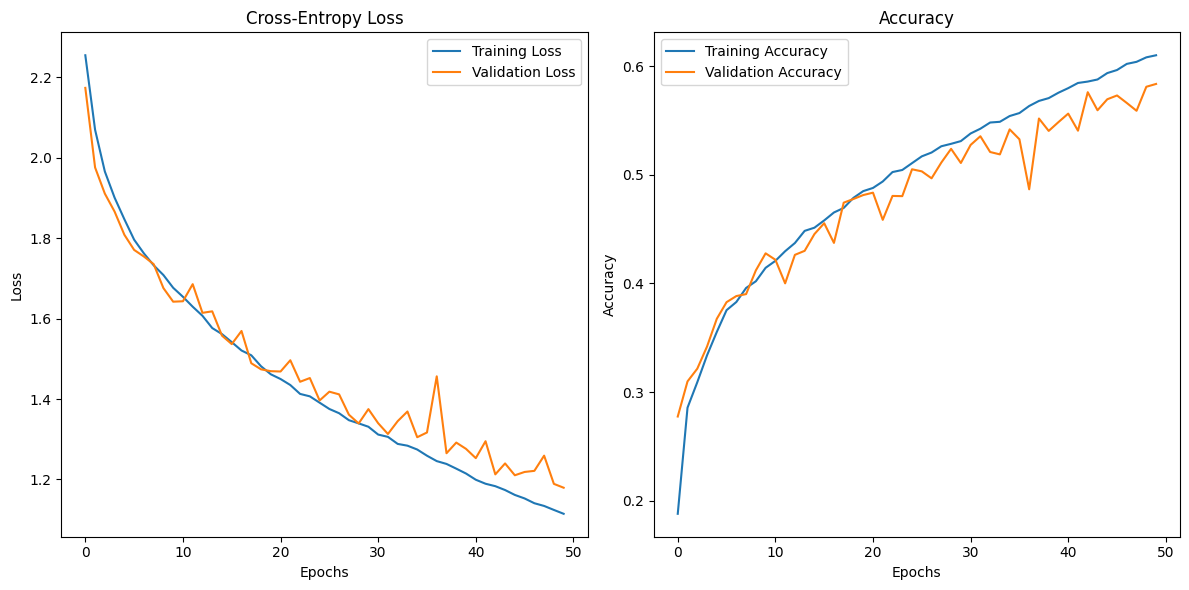

In [16]:
# Plot the training and validation accuracy and loss curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Cross-Entropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10

In [18]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpooling (MaxPooling2D)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_128 (Dense)                    │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.1403 - loss: 2.2754 - val_accuracy: 0.2225 - val_loss: 2.1812
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2331 - loss: 2.1425 - val_accuracy: 0.2630 - val_loss: 2.0876
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2747 - loss: 2.0527 - val_accuracy: 0.2346 - val_loss: 2.0779
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3034 - loss: 1.9763 - val_accuracy: 0.3400 - val_loss: 1.8930
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3372 - loss: 1.8917 - val_accuracy: 0.3349 - val_loss: 1.8804
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3541 - loss: 1.8507 - val_accuracy: 0.3679 - val_loss: 1.7946
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3730 - loss: 1.7976 - val_accuracy: 0.3887 - val_loss: 1.7639
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3841 - loss: 1.7717 - val_accuracy: 0.3922 - val_loss

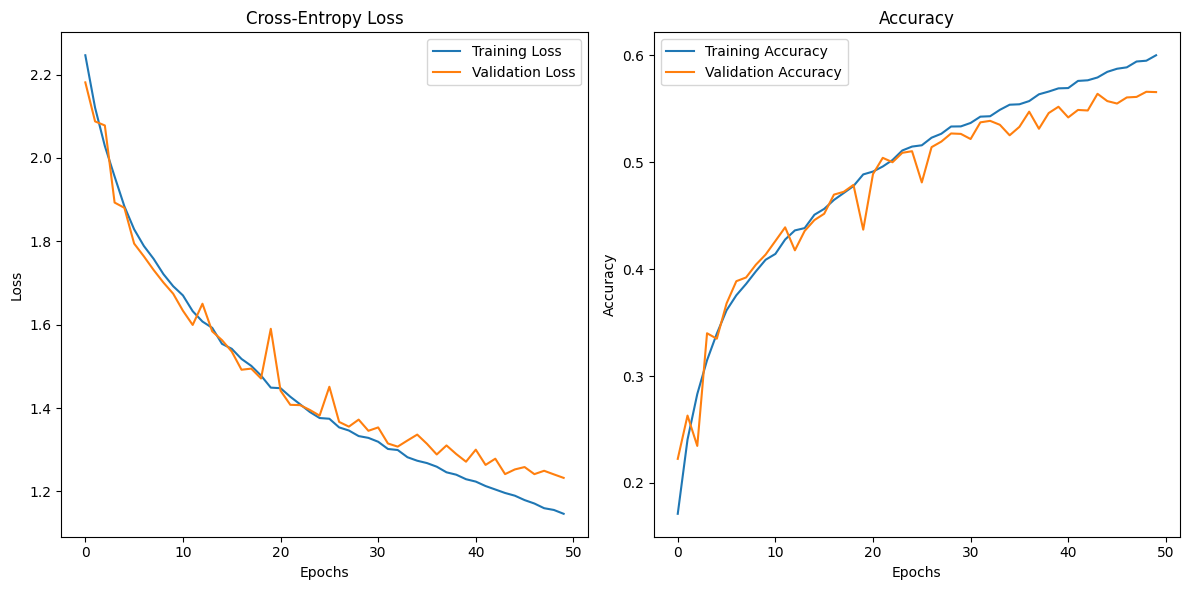

In [19]:
model = models.Sequential()
# First Convolutional Block: Two 3x3 convolutional layers with 32 filters and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3), name='conv2d_1'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='conv2d_2'))
model.add(layers.MaxPooling2D((2, 2), name='maxpooling'))
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(128, activation='relu', name='dense_128'))
model.add(layers.Dense(10, activation='softmax', name='output_layer'))
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Cross-Entropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


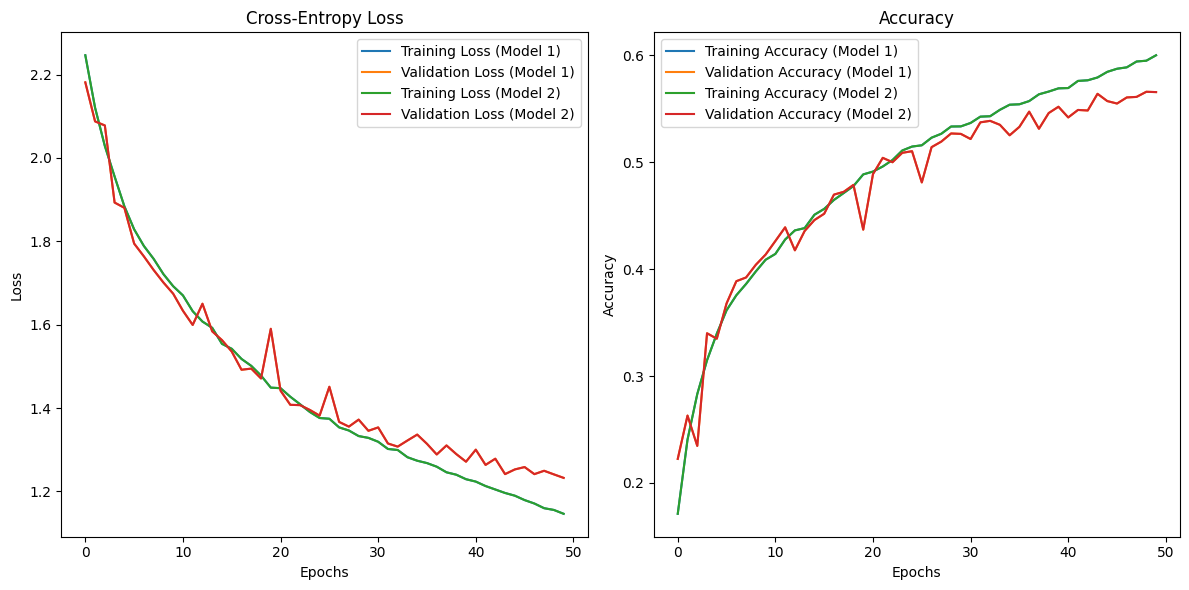

In [21]:
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss (Model 1)')
plt.plot(history.history['val_loss'], label='Validation Loss (Model 1)')
plt.plot(history.history['loss'], label='Training Loss (Model 2)')
plt.plot(history.history['val_loss'], label='Validation Loss (Model 2)')
plt.title('Cross-Entropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy (Model 1)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (Model 1)')
plt.plot(history.history['accuracy'], label='Training Accuracy (Model 2)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (Model 2)')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

\

**Comment on the observation**

Model 2 (Deeper) should have higher validation accuracy and lower loss, but may risk overfitting.
Model 1 (Simpler) might show a quicker convergence with lower risk of overfitting but might not perform as well in terms of accuracy.

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


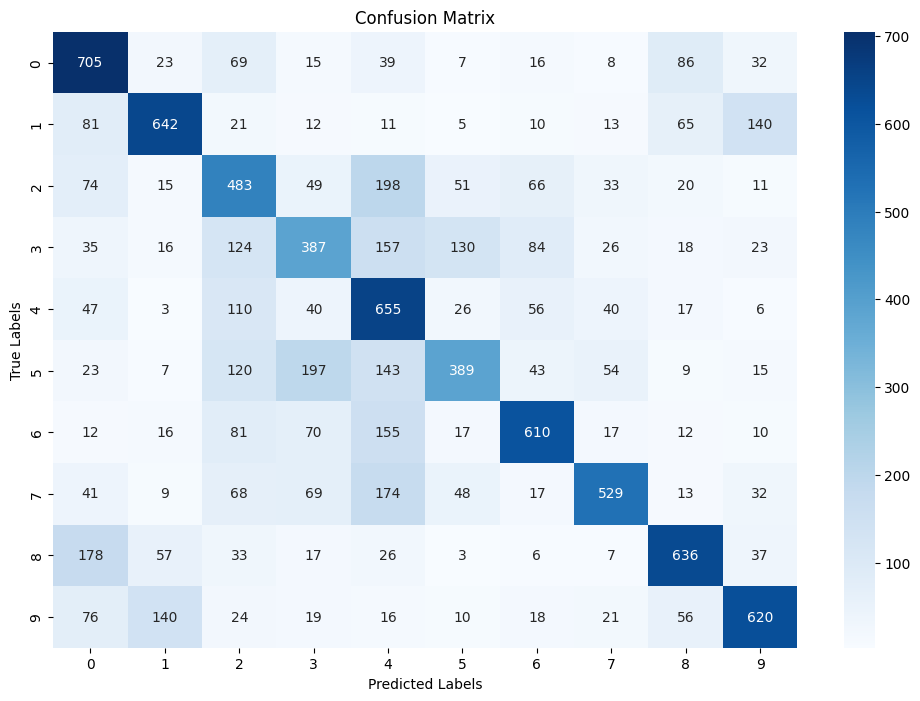

In [23]:
# Predict the labels for the test set
y_pred = model.predict(x_test)  # Get predictions for the test set

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert true labels from one-hot encoding to class labels
y_test_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**Comment here :**

Misclassifying airplanes as cars
Misclassifying birds as airplanes: This could be another common confusion due to visual similarities.


*    Print the test accuracy for the trained model.

In [24]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - 5ms/step - accuracy: 0.5656 - loss: 1.2326


In [25]:
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test Accuracy: 56.56%


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [26]:
from keras.backend import clear_session
clear_session()

In [ ]:
mport numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential

In [27]:
from tensorflow.keras import layers, models

In [37]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model as shown earlier
model = Sequential()

# Input layer with 64x64 image size and 3 channels (RGB)
model.add(layers.InputLayer(input_shape=(32, 32, 3)))  # CIFAR-10 images are 32x32
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 104ms/step - accuracy: 0.1143 - loss: 2.3024 - val_accuracy: 0.1406 - val_loss: 2.2989
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1444 - loss: 2.2978 - val_accuracy: 0.1789 - val_loss: 2.2936
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1865 - loss: 2.2919 - val_accuracy: 0.1648 - val_loss: 2.2819
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1704 - loss: 2.2764 - val_accuracy: 0.1901 - val_loss: 2.2451
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1978 - loss: 2.2231 - val_accuracy: 0.2208 - val_loss: 2.1446
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.2195 - loss: 2.1389 - val_accuracy: 0.2725 - val_loss: 2.0718
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.2643 - loss: 2.0723 - val_accuracy: 0.2407 - val_loss: 2.0639
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.2889 - loss: 2.0002 - val_accuracy: 0.2702 -

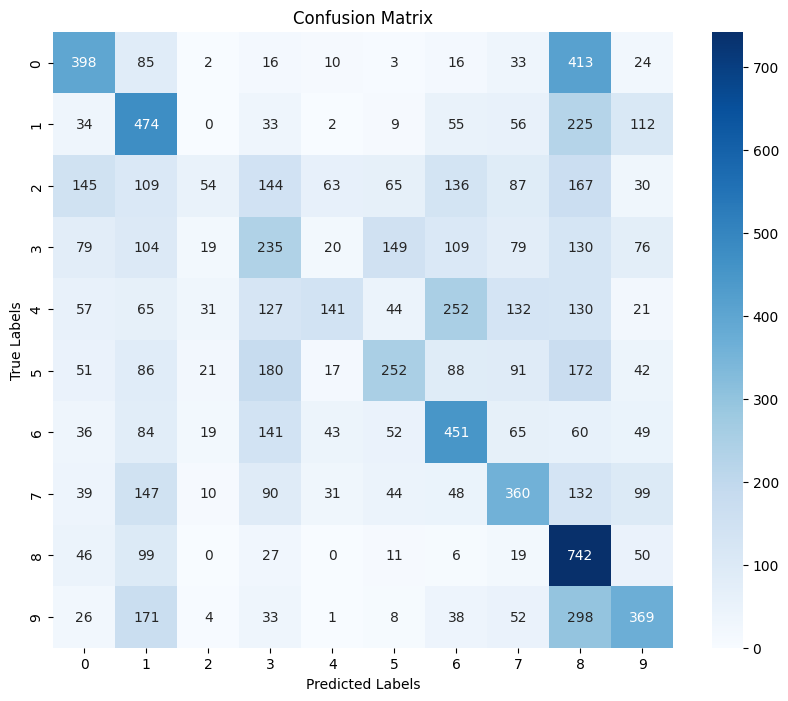

Class Confusions Analysis:
airplane is most confused with ship
automobile is most confused with automobile
bird is most confused with ship
cat is most confused with cat
deer is most confused with frog
dog is most confused with dog
frog is most confused with frog
horse is most confused with horse
ship is most confused with ship
truck is most confused with truck


In [38]:
# Compile the model
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the CIFAR-10 data
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))

# Evaluate the model on the test data and make predictions
y_pred = model.predict(x_test)

# Convert predictions from one-hot encoding to labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print comments on class confusions
print("Class Confusions Analysis:")
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    row = cm[i]
    most_confused_class = np.argmax(row)
    print(f"{class_names[i]} is most confused with {class_names[most_confused_class]}")


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



_ Activation functions introduce non-linearity to the model, enabling it to learn complex patterns and make decisions based on non-linear relationships in the data.

2 - Key Differences between sigmoid and softmax:




_ Sigmoid: Outputs a single probability for binary classification (0 or 1).
Softmax: Outputs a probability distribution across multiple classes for multi-class classification.


3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_ Categorical Crossentropy: Used for multi-class classification with one-hot encoded labels.
Binary Crossentropy: Used for binary classification with labels 0 or 1.
